In [1]:
%load_ext lab_black
"""Black Formatter for lab"""

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
from pathlib import Path
import quantstats as qs
import sqlite3
import yfinance as yf

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 80)
# pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

In [2]:
def get_table(table_name, test_number=None):
    """
    Collects a table for an individual test.
    """
    # Creates connection and downloads the latest database data.
    engine = create_db_connection()

    if test_number:
        sql_v = f"SELECT * FROM {table_name} WHERE test_number='{test_number}';"
    else:
        sql_v = f"SELECT * FROM {table_name};"

    df = pd.read_sql(sql_v, con=engine)

    try:
        df["Date"] = pd.to_datetime(df["Date"])
        df["Date"] = df["Date"].dt.date
    except:
        pass

    try:
        del df["index"]
    except:
        pass

    return df


def create_db_connection():
    """
    Opens a database connection.
    """
    dir = Path("data")
    filename = "results.db"
    filepath = dir / filename
    return sqlite3.connect(filepath)


engine = create_db_connection()
# Get all the table names.
sql = "SELECT name FROM sqlite_master WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1;"
tables = pd.read_sql(sql, con=engine)["name"].tolist()
tables.remove("transaction")

single_res_tables = ["dimension", "drawdown", "trade_analysis"]
df_combined = pd.DataFrame()
for srt in single_res_tables:
    if srt in tables:
        df = get_table(srt)
        df = df.set_index("test_number")

        if df_combined.empty:
            df_combined = df
        else:
            df_combined = df_combined.join(df)
df_combined.sort_values("pnl_gross_total", ascending=False).head(20)

,batchname,from_date,trade_start,to_date,instrument,benchmark,commission,mult,sma_fast,sma_slow,limit_price,stop_price,trade_size,len,drawdown,moneydown,max_len,max_drawdown,max_moneydown,total_total,total_open,total_closed,streak_won_current,streak_won_longest,streak_lost_current,streak_lost_longest,pnl_gross_total,pnl_gross_average,pnl_net_total,pnl_net_average,won_total,won_pnl_total,won_pnl_average,won_pnl_max,lost_total,lost_pnl_total,lost_pnl_average,lost_pnl_max,long_total,long_pnl_total,...,short_pnl_lost_average,short_pnl_lost_max,short_won,short_lost,len_total,len_average,len_max,len_min,len_won_total,len_won_average,len_won_max,len_won_min,len_lost_total,len_lost_average,len_lost_max,len_lost_min,len_long_total,len_long_average,len_long_max,len_long_min,len_long_won_total,len_long_won_average,len_long_won_max,len_long_won_min,len_long_lost_total,len_long_lost_average,len_long_lost_max,len_long_lost_min,len_short_total,len_short_average,len_short_max,len_short_min,len_short_won_total,len_short_won_average,len_short_won_max,len_short_won_min,len_short_lost_total,len_short_lost_average,len_short_lost_max,len_short_lost_min
test_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c29671b02a,Single Test,2016-01-01,2016-09-01,2020-12-31,FB,SPY,0.0000,1,30,45,0.0700,0.0500,1.0000,37.0000,4.2770,7121.4544,77.0000,5.9890,8690.5678,10.0000,0.0000,10.0000,0.0000,5.0000,1.0000,1.0000,59382.5745,5938.2574,59382.5745,5938.2574,8.0000,71902.6909,8987.8364,14485.9825,2.0000,-12520.1164,-6260.0582,-7121.4544,10.0000,59382.5745,...,0.0000,0.0000,0.0000,0.0000,149.0000,14.9000,30.0000,1.0000,134.0000,16.7500,30.0000,9.0000,15.0000,7.5000,14.0000,1.0000,149.0000,14.9000,30.0000,1.0000,134.0000,16.7500,30.0000,9.0000,15.0000,7.5000,14.0000,1.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000
54eb72dc29,Single Test,2016-01-01,2016-09-01,2020-12-31,FB,SPY,0.0000,1,15,45,0.0700,0.0500,1.0000,42.0000,3.6945,5954.8804,42.0000,5.7162,6925.7280,8.0000,0.0000,8.0000,0.0000,7.0000,1.0000,1.0000,55226.3595,6903.2949,55226.3595,6903.2949,7.0000,60143.3523,8591.9075,13647.8726,1.0000,-4916.9928,-4916.9928,-4916.9928,8.0000,55226.3595,...,0.0000,0.0000,0.0000,0.0000,134.0000,16.7500,55.0000,2.0000,132.0000,18.8571,55.0000,3.0000,2.0000,2.0000,2.0000,2.0000,134.0000,16.7500,55.0000,2.0000,132.0000,18.8571,55.0000,3.0000,2.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000
c764260be7,Single Test,2016-01-01,2016-09-01,2020-12-31,FB,SPY,0.0000,1,15,45,0.0700,0.0500,1.0000,42.0000,3.6945,5954.8804,42.0000,5.7162,6925.7280,8.0000,0.0000,8.0000,0.0000,7.0000,1.0000,1.0000,55226.3595,6903.2949,55226.3595,6903.2949,7.0000,60143.3523,8591.9075,13647.8726,1.0000,-4916.9928,-4916.9928,-4916.9928,8.0000,55226.3595,...,0.0000,0.0000,0.0000,0.0000,134.0000,16.7500,55.0000,2.0000,132.0000,18.8571,55.0000,3.0000,2.0000,2.0000,2.0000,2.0000,134.0000,16.7500,55.0000,2.0000,132.0000,18.8571,55.0000,3.0000,2.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000
a191d5534a,Single Test,2016-01-01,2016-09-01,2020-12-31,FB,SPY,0.0000,1,15,60,0.0700,0.0500,1.0000,0.0000,0.0000,0.0000,116.0000,7.4674,9838.6012,8.0000,0.0000,8.0000,4.0000,4.0000,0.0000,1.0000,32006.8831,4000.8604,32006.8831,4000.8604,6.0000,41215.2823,6869.2137,8862.0211,2.0000,-9208.3992,-4604.1996,-4920.9528,8.0000,32006.8831,...,0.0000,0.0000,0.0000,0.0000,108.0000,13.5000,26.0000,1.0000,105.0000,17.5000,26.0000,8.0000,3.0000,1.5000,2.0000,1.0000,108.0000,13.5000,26.0000,1.0000,105.0000,17.5000,26.0000,8.0000,3.0000,1.5000,2.0000,1.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,9223372036854775808.0000,0.0000,0.0000,0.0000,922337203685477

In [3]:
# df_combined.to_excel("multi_test.xlsx")

In [5]:
print(tables)

['benchmark', 'dimension', 'drawdown', 'global_out', 'ohlcv', 'order_history', 'quantstats', 'trade', 'trade_analysis', 'trade_list', 'value']


### Create a new object for the pairs.

In [6]:
"""Enter a test number from above."""

tn = "7505f27381"

df = get_table("trade_list", tn).sort_values("ref")
df

,test_number,ref,ticker,dir,datein,pricein,dateout,priceout,chng_pct,pnl,pnl_pct,size,value,cumpnl,nbars,pnl/bar,mfe_pct,mae_pct
0,7505f27381,1,FB,long,2017-01-24 23:59:59.999989,129.3800,2017-03-07 23:59:59.999989,137.9551,6.6300,5985.8761,5.6500,698.0532,90314.1239,5985.8761,29,206.4100,6.9500,-0.7700
1,7505f27381,2,FB,long,2018-05-21 23:59:59.999989,183.7700,2018-06-14 23:59:59.999989,195.4676,6.3700,6107.9612,5.4500,522.1551,95956.4375,12093.8372,17,359.2900,7.3500,-0.8700
2,7505f27381,3,FB,long,2019-02-01 23:59:59.999989,165.8400,2019-04-09 23:59:59.999989,178.3583,7.5500,7576.3504,6.3300,605.2220,100370.0148,19670.1877,46,164.7000,8.0500,-3.9600
3,7505f27381,4,FB,long,2019-07-16 23:59:59.999989,203.8900,2019-07-30 23:59:59.999989,193.7145,-4.9900,-5374.5946,-4.7000,528.1897,107692.6051,14295.5930,10,-537.4600,2.3400,-5.1000
4,7505f27381,5,FB,long,2019-11-08 23:59:59.999989,190.0000,2019-11-29 23:59:59.999989,203.7494,7.2400,7427.5089,6.1000,540.2060,102639.1472,21723.1019,14,530.5400,7.2600,-0.7700
5,7505f27381,6,FB,long,2020-05-11 23:59:59.999989,210.8900,2020-05-14 23:59:59.999989,201.7325,-4.3400,-4724.3295,-4.0400,515.8973,108797.5817,16998.7724,3,-1574.7800,2.0800,-4.8400
6,7505f27381,7,FB,long,2020-11-10 23:59:59.999989,273.1000,2020-11-23 23:59:59.999989,264.8315,-3.0300,-3123.2339,-2.7400,377.7268,103157.1843,13875.5385,9,-347.0300,2.4400,-3.3300


In [7]:
df = get_table("value", tn)
df = df.set_index("Date")
bm = yf.download("^GSPC", start=df.index.values[0], end=df.index.values[-1])
vd = df[["Value"]].join(bm["Adj Close"])

# This is the main dataframe with daily data for each of the cient's transactions and values as well
# as the values resulting from the long short pair transaction.
vd.columns = ["value", "bm"]
vd.index = pd.to_datetime(vd.index)

vd["value_return"] = vd["value"].pct_change()
vd["bm_return"] = vd["bm"].pct_change()

# Get log returns
vd["value_log"] = qs.utils.log_returns(vd["value_return"])
vd["bm_log"] = qs.utils.log_returns(vd["bm_return"])

# Rebase to 100
vd["value_rebase"] = qs.utils.rebase(vd["value"])
vd["bm_rebase"] = qs.utils.rebase(vd["bm"])

# Exponentially weighted standard deviation.
vd["value_estdev"] = qs.utils.exponential_stdev(vd["value"])
vd["bm_estdev"] = qs.utils.exponential_stdev(vd["bm"])

# Calculate excess returns over the de.
vd["excess_return"] = qs.utils.to_excess_returns(
    returns=vd["value_return"], rf=vd["bm_return"]
)

# Drawdown details
vd["value_drawdown"] = qs.stats.to_drawdown_series(vd["value"])
vd["bm_drawdown"] = qs.stats.to_drawdown_series(vd["bm"])
vd = vd.fillna(0)
vd.head(40)

[*********************100%***********************]  1 of 1 completed


,value,bm,value_return,bm_return,value_log,bm_log,value_rebase,bm_rebase,value_estdev,bm_estdev,excess_return,value_drawdown,bm_drawdown
Date,,,,,,,,,,,,,
2016-01-04,100000.0000,2012.6600,0.0000,0.0000,0.0000,0.0000,100.0000,100.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-05,100000.0000,2016.7100,0.0000,0.0020,0.0000,0.0020,100.0000,100.2012,0.0000,0.0000,-0.0020,0.0000,0.0000
2016-01-06,100000.0000,1990.2600,0.0000,-0.0131,0.0000,-0.0132,100.0000,98.8870,0.0000,0.0000,0.0131,0.0000,-0.0131
2016-01-07,100000.0000,1943.0900,0.0000,-0.0237,0.0000,-0.0240,100.0000,96.5434,0.0000,0.0000,0.0237,0.0000,-0.0365
2016-01-08,100000.0000,1922.0300,0.0000,-0.0108,0.0000,-0.0109,100.0000,95.4970,0.0000,0.0000,0.0108,0.0000,-0.0469
2016-01-11,100000.0000,1923.6700,0.0000,0.0009,0.0000,0.0009,100.0000,95.5785,0.0000,0.0000,-0.0009,0.0000,-0.0461
2016-01-12,100000.0000,1938.6801,0.0000,0.0078,0.0000,0.0078,100.0000,96.3243,0.0000,0.0000,-0.0078,0.0000,-0.0387
2016-01-13,100000.0000,1890.2800,0.0000,-0.0250,0.0000,-0.0253,100.0000,93.9195,0.0000,0.0000,0.0250,0.0000,-0.0627
2016-01-14,100000.0000,1921.8400,0.0000,0.0167,0.0000,0.0166,100.0000,95.4876,0.0000,0.0000,-0.0167,0.0000,-0.0470


In [8]:
# Drawdown period analysis.
drawdown = qs.stats.drawdown_details(vd["value_drawdown"])
drawdown.head(10)

,start,valley,end,days,max drawdown,99% max drawdown
0,2017-01-24,2017-01-24,2017-01-25,1,-0.0070,0.0000
1,2017-01-27,2017-01-31,2017-02-01,5,-1.6774,-1.2274
2,2017-02-02,2017-02-02,2017-02-08,6,-1.6247,-1.5295
3,2017-02-09,2017-02-15,2017-02-22,13,-0.5133,-0.4525
4,2017-02-23,2017-02-23,2017-02-27,4,-0.5067,-0.4533
5,2017-02-28,2017-02-28,2017-03-01,1,-0.5789,0.0000
6,2017-03-02,2017-03-02,2017-03-06,4,-0.4362,-0.1652
7,2018-05-22,2018-05-22,2018-05-23,1,-0.3387,0.0000
8,2018-05-24,2018-05-25,2018-05-30,6,-0.9607,-0.5628
9,2018-06-04,2018-06-07,2018-06-14,10,-2.7252,-2.2936


In [9]:
# rolling greeks
rolling_greeks = qs.stats.rolling_greeks(
    returns=vd["value_return"], benchmark=vd["bm_return"], periods=252
)
rolling_greeks.tail()

,beta,alpha
Date,,
2020-12-23,0.0084,0.0001
2020-12-24,0.0084,0.0001
2020-12-28,0.0084,0.0001
2020-12-29,0.0084,0.0001
2020-12-30,0.0084,0.0001


In [10]:
metrics = qs.reports.metrics(
    returns=vd["value_return"], benchmark=vd["bm_return"], mode="full", display=False
)
metrics.columns = ["value", "bm"]
metrics.head(60)

,value,bm
Start Period,2016-01-04,2016-01-04
End Period,2020-12-30,2020-12-30
Risk-Free Rate,0.0000,0.0000
Time in Market,0.1100,1.0000
Cumulative Return,0.1400,0.8500
CAGR%,0.0300,0.1300
Sharpe,0.4900,0.7400
Sortino,0.7600,1.0200
Max Drawdown,-0.0700,-0.3400
Longest DD Days,232,214


In [11]:
# Yearly returns
year_return = pd.concat(
    [
        qs.utils.group_returns(vd["value_return"], vd.index.year),
        qs.utils.group_returns(vd["bm_return"], vd.index.year),
    ],
    axis=1,
)
year_return

,value_return,bm_return
Date,,
2016,0.0000,0.1149
2017,0.0591,0.1798
2018,0.0568,-0.0499
2019,0.0875,0.2616
2020,-0.0657,0.2028


In [12]:
# Yearly/Monthly returns
month_return = pd.concat(
    [
        qs.utils.group_returns(vd["value_return"], [vd.index.year, vd.index.month]),
        qs.utils.group_returns(vd["bm_return"], [vd.index.year, vd.index.month]),
    ],
    axis=1,
)
month_return

value_return  bm_return
Date Date                         
2016 1           0.0000    -0.0346
     2           0.0000    -0.0028
     3           0.0000     0.0645
     4           0.0000     0.0031
     5           0.0000     0.0157
     6           0.0000     0.0024
     7           0.0000     0.0352
     8           0.0000    -0.0011
     9           0.0000    -0.0004
     10          0.0000    -0.0194
     11          0.0000     0.0341
     12          0.0000     0.0183
2017 1           0.0067     0.0179
     2           0.0362     0.0366
     3           0.0161    -0.0001
     4           0.0000     0.0092
     5           0.0000     0.0118
     6           0.0000     0.0050
     7           0.0000     0.0193
     8           0.0000     0.0009
     9           0.0000     0.0192
     10          0.0000     0.0221
     11          0.0000     0.0279
     12          0.0000     0.0099
2018 1           0.0000     0.0550
     2           0.0000    -0.0370
     3           0.0000    -0.0256
     4           0.0000     0.0039
     5           0.0391     0.0218
     6           0.0177     0.0051
     7           0.0000     0.0357
     8           0.0000     0.0300
     9           0.0000     0.0044
     10          0.0000    -0.0696
     11          0.0000     0.0191
     12          0.0000    -0.0929
2019 1           0.0000     0.0772
     2          -0.0231     0.0296
     3           0.0308     0.0183
     4           0.0616     0.0387
     5           0.0000    -0.0671
     6           0.0000     0.0672
     7          -0.0453     0.0133
     8           0.0000    -0.0161
     9           0.0000     0.0173
     10          0.0000     0.0210
     11          0.0636     0.0336
     12          0.0000     0.0284
2020 1           0.0000    -0.0011
     2           0.0000    -0.0854
     3           0.0000    -0.0966
     4           0.0000     0.1265
     5          -0.0391     0.0463
     6           0.0000     0.0219
     7           0.0000     0.0544
     8           0.0000     0.0681
     9           0.0000    -0.0375
     10          0.0000    -0.0262
     11         -0.0266     0.1034
     12          0.0000     0.0290

In [13]:
month_return_agg = pd.concat(
    [
        qs.utils.aggregate_returns(vd["value_return"], period="month"),
        qs.utils.aggregate_returns(vd["bm_return"], period="month"),
    ],
    axis=1,
)
month_return_agg

,value_return,bm_return
Date,,
1,0.0066,0.1161
2,0.0116,-0.0638
3,0.0456,-0.0766
4,0.0627,0.1882
5,-0.0009,0.0246
6,0.0175,0.1001
7,-0.0449,0.1691
8,0.0000,0.0818
9,0.0000,-0.0008


In [14]:
quarter_return_agg = pd.concat(
    [
        qs.utils.aggregate_returns(vd["value_return"], period="quarter"),
        qs.utils.aggregate_returns(vd["bm_return"], period="quarter"),
    ],
    axis=1,
)
quarter_return_agg

,value_return,bm_return
Date,,
1,0.0647,-0.0351
2,0.0803,0.3394
3,-0.0449,0.2637
4,0.0366,0.1339


# Plots

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


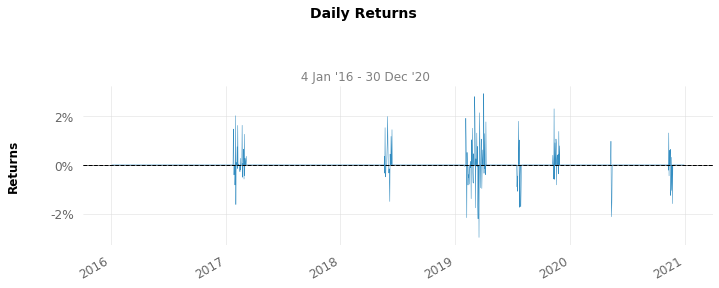

In [15]:
# Daily Returns
qs.plots.daily_returns(returns=vd["value_return"])

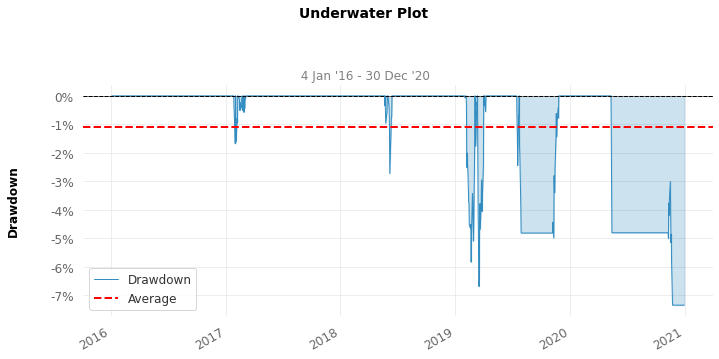

In [16]:
# Drawdown
qs.plots.drawdown(returns=vd["value_return"])

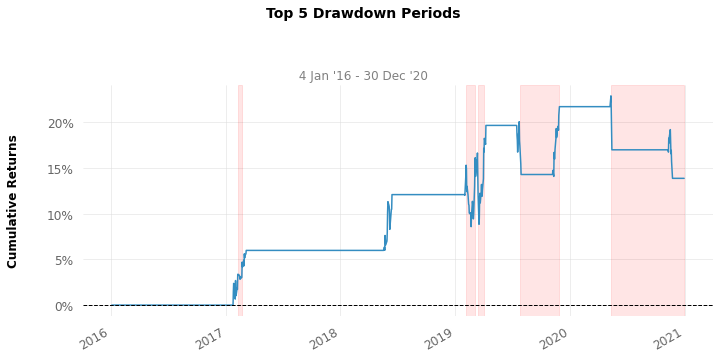

In [17]:
# Drawdown Periods
qs.plots.drawdowns_periods(returns=vd["value_return"])

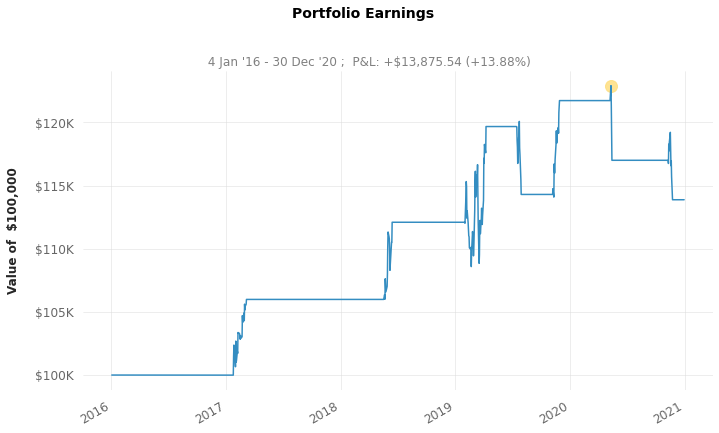

In [18]:
# Drawdown
qs.plots.earnings(returns=vd["value_return"], start_balance=100000)

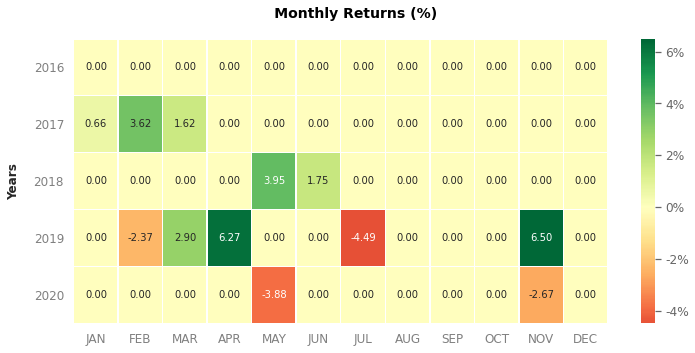

In [19]:
# Heatmap
qs.plots.monthly_heatmap(returns=vd["value_return"])

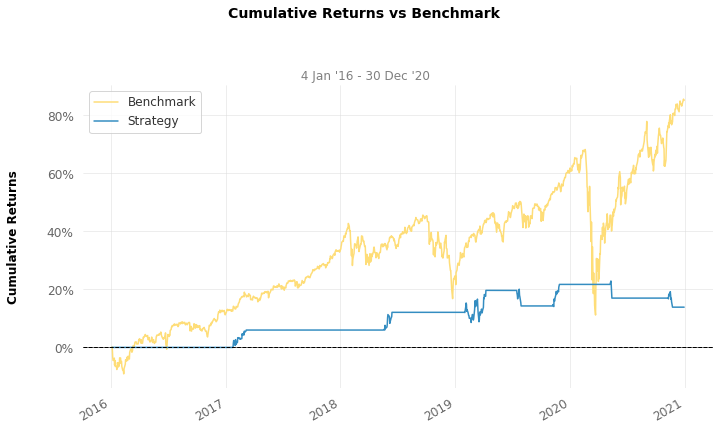

In [20]:
# Cumulative Returns
qs.plots.returns(returns=vd["value_return"], benchmark=vd["bm_return"])

In [21]:
# Cumulative Returns
# qs.plots.yearly_returns(returns=vd["value_return"], benchmark=vd["bm_return"])

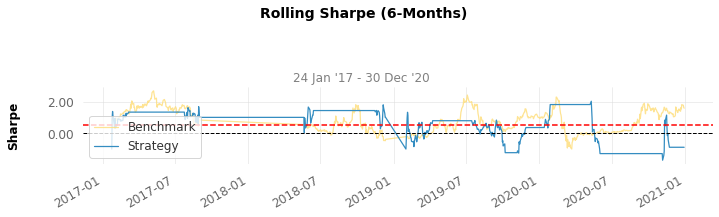

In [22]:
# Rolling Sharpe
qs.plots.rolling_sharpe(
    returns=vd["value_return"],
    benchmark=vd["bm_return"],
    period=126,
    period_label="6-Months",
)

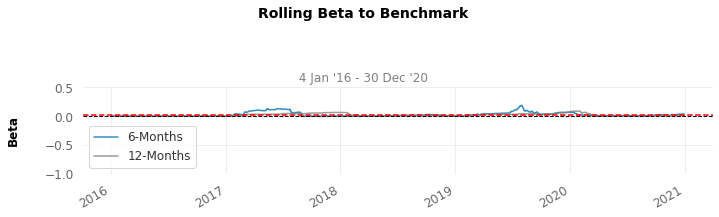

In [23]:
# Rolling beta
qs.plots.rolling_beta(
    returns=vd["value_return"],
    benchmark=vd["bm_return"],
    window1=126,
    window1_label="6-Months",
    window2=252,
    window2_label="12-Months",
)

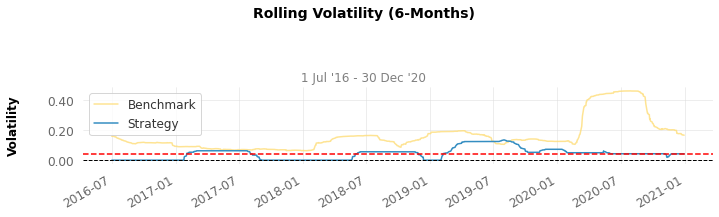

In [24]:
# Rolling volatility
qs.plots.rolling_volatility(
    returns=vd["value_return"],
    benchmark=vd["bm_return"],
    period=126,
    period_label="6-Months",
)